# 多層パーセプトロン

XORを実装するためには, AND, NAND, ORゲートを組み合わせなければならない。

入力を $x_1$,  $x_2$, NANDの出力を $s_1$, ORの出力を $s_2$ とすると、$s_1$, $s_2$を入力としたANDの出力 $y$ は以下の表の通りになる:

| $x_1$ | $x_2$ | $s_1$ | $s_2$ | $y$ |
| ----- | ----- | ----- | ----- | --- |
|  $0$  |  $0$  |  $1$  |  $0$  | $0$ |
|  $1$  |  $0$  |  $1$  |  $1$  | $1$ |
|  $0$  |  $1$  |  $1$  |  $1$  | $1$ |
|  $1$  |  $1$  |  $0$  |  $1$  | $0$ |

では、前に作成したNAND, ORを使用して、XORの結果を出力する関数を作成しよう。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def AND(x1, x2):
    """
    AND関数
    
    Parameters
    ----------
    x1 : float
        入力1
    x2 : float
        入力2
    """
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    """
    NAND関数
    
    Parameters
    ----------
    x1 : float
        入力1
    x2 : float
        入力2
    """
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    """
    OR関数
    
    Parameters
    ----------
    x1 : float
        入力1
    x2 : float
        入力2
    """
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## XORゲートの実装

In [2]:
def XOR(x1, x2):
    """
    XOR関数
    
    Parameters
    ----------
    x1 : float
        入力1
    x2 : float
        入力2
    """
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [3]:
XOR(0, 0)

0

In [4]:
XOR(1, 0)

1

In [5]:
XOR(0, 1)

1

In [6]:
XOR(1, 1)

0

このように、複数のパーセプトロンを組み合わせたパーセプトロンのことを **多層パーセプトロン** という。  
XORは、NAND, ORの出力とANDの出力の組み合わせなので、2層のパーセプトロンである。
(本によっては、入力$x_1$, $x_2$も入れて3層とすることもある)

## 🤔XORをグラフにすると？

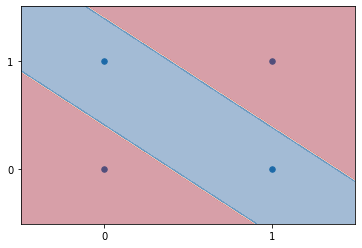

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

if __name__ == "__main__":
    xs = np.array([[0, 0],
                   [1, 0],
                   [0, 1],
                   [1, 1]], dtype=np.float32)      # データ



    w = np.array([0, 0], dtype=np.float32)  # 重み
    b = 0  # バイアス
    lr = 0.01  # 学習率

    def predict(x):
        u = np.dot(x, w) - b
        return np.where(u > 0, 1, 0)

    # グラフの描画 from https://teratail.com/questions/177319
    fig, ax = plt.subplots()
    ax.set_xticks([0, 1]), ax.set_yticks([0, 1])
    ax.set_xlim(-0.5, 1.5), ax.set_ylim(-0.5, 1.5)

    # サンプルを描画する。
    ax.scatter(xs[:, 0], xs[:, 1], s=30)

    # 各点の推論結果を得る。
    X, Y = np.meshgrid(np.linspace(*ax.get_xlim(), 100),
                       np.linspace(*ax.get_ylim(), 100))
    XY = np.column_stack([X.ravel(), Y.ravel()])
    Z = np.array([XOR(x[0], x[1]) for x in XY]).reshape(X.shape)

    # 等高線を描画する。
    ax.contourf(X, Y, Z, alpha=0.4, cmap='RdBu')

    plt.show()

曲線にならなかったね…